# Linear models advanced
- Normalization
- L2 regularization (Ridge regression)

residual = mse -> min
- $\text{min}~$ $mse + \alpha ||w||_2$
- $\text{min}~$ $\frac{1}{N}\sum(w_ix_iy_i)^2 + \alpha\sqrt{\sum(w_i^2)}$

In [1]:
# add magic instructions for autoreloading the packages
# when you edit utils.py, the notebook is automatically updated
%load_ext autoreload
%autoreload 2

### Dataset example with outliers

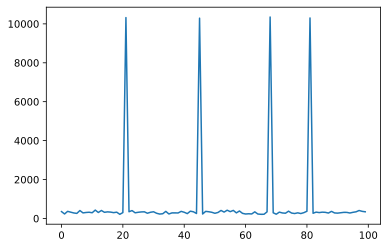

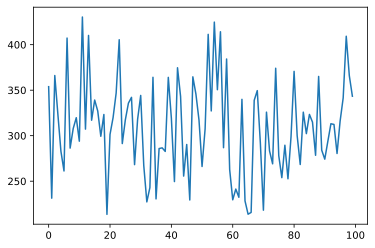

In [2]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 100
num_features = 20
xs = np.random.uniform(10, 50, size=(num_samples, num_features))
# xs = np.random.uniform(10, 50, size=(num_samples, num_features)) + 10 * np.array(range(num_samples)).reshape(-1, 1)
w = np.random.rand(num_features)
noise_sigma = 50 # pretty big noise
ys = np.sum(xs * w, axis=1) + noise_sigma * np.random.randn(num_samples) # target
ys_0 = ys.copy() # what happens if we don't do copy

for k in range(4):
    ys[np.random.randint(num_samples)] += 10000

plt.plot(ys)
plt.figure()
plt.plot(ys_0)

plt.show()

### Compare Linear & Norm-linear

,LR,Norm LR
MSE,2.785576e+06,2.785493e+06
MAE,9.999938e+02,9.996061e+02
R^2,-1.622759e+00,-1.624498e+00
"W, MSE",3.947989e+02,3.997866e-01
"W, MAE",1.537979e+01,5.253978e-01


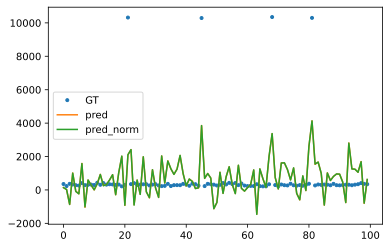

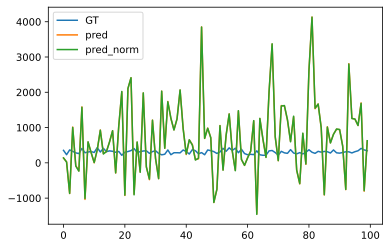

In [3]:
import utils

w_hat = utils.solve(xs, ys)
y_hat = np.dot(xs, w_hat)
y_hat_norm, norm_w_hat = utils.solve_predict_norm(xs, ys)

# 1st figure (with outliers)
plt.plot(ys, marker=".", lw=0, label="GT")
plt.plot(y_hat, label="pred")
plt.plot(y_hat_norm, label="pred_norm")
plt.legend()

# 2nd figure (without outliers, to see very big predict residuals)
plt.figure()
plt.plot(ys_0, label="GT")
plt.plot(y_hat, label="pred")
plt.plot(y_hat_norm, label="pred_norm")
plt.legend()

res_df =  pd.DataFrame(data={
    "LR": [
        utils.mse(y_hat, ys), utils.mae(y_hat, ys), utils.r2(y_hat, ys),
        utils.mse(w_hat, w), utils.mae(w_hat, w)
    ],
    "Norm LR": [
        utils.mse(y_hat_norm, ys), utils.mae(y_hat_norm, ys), utils.r2(y_hat_norm, ys),
        utils.mse(norm_w_hat, w), utils.mae(norm_w_hat, w)
    ],
}, columns=["LR", "Norm LR"], index=["MSE", "MAE", "R^2", "W, MSE", "W, MAE"])

res_df

### Linear Regression
- $w = (X^TX)^{-1}X^TY$

### Ridge Regression
- $w_{ridge} = (X^TX+\alpha I)^{-1}X^TY$

1.2336393751233202e+84 2031898.458119139


,LR,Norm LR,Ridge
MSE,2.785576e+06,2.785493e+06,2.785576e+06
MAE,9.999938e+02,9.996061e+02,9.999558e+02
R^2,-1.622759e+00,-1.624498e+00,-1.623147e+00
"W, MSE",3.947989e+02,3.997866e-01,3.947309e+02
"W, MAE",1.537979e+01,5.253978e-01,1.537864e+01


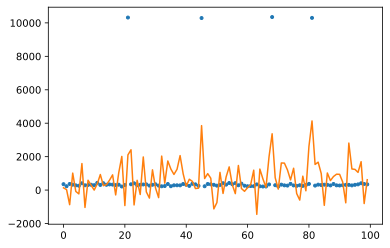

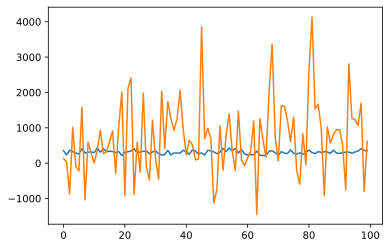

In [4]:
# Ridge regression

# compute solution using linear algebra
alpha = 1
x_t = np.transpose(xs)
x_t_x = np.dot(x_t, xs)
x_t_y = np.dot(x_t, ys)
x_t_x_inv = np.linalg.inv(x_t_x + alpha * np.eye(num_features))
w_hat = np.dot(x_t_x_inv, x_t_y) # w_hat is a solution, it contains coefficients
y_hat = np.dot(xs, w_hat) # y_hat are our predictions

print(np.linalg.det(x_t_x), sum(np.diag(x_t_x))) # determinant & trace

plt.plot(ys, marker=".", lw=0)
plt.plot(y_hat)
plt.figure()
plt.plot(ys_0)
plt.plot(y_hat)

res_df["Ridge"] = [utils.mse(y_hat, ys), utils.mae(y_hat, ys), utils.r2(y_hat, ys), 
                   utils.mse(w_hat, w), utils.mae(w_hat, w)]
res_df

MSE, Ridge(a=2.6e6:): 4020013.8767585377
MSE, Linear         : 2785575.7420185977


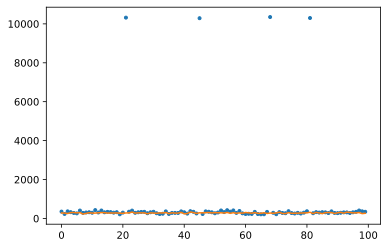

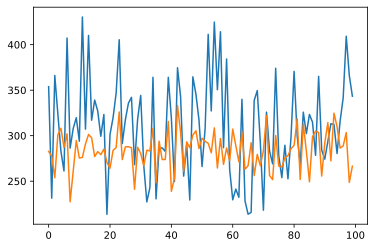

In [5]:
# when we change alpha 1 --> 2.6e6
# the performance is better and prediction plot is better
# because of 4 outliers, affecting mse score

alpha = 2.6e6
w_hat = utils.solve(xs, ys, alpha=alpha)
y_hat = np.dot(xs, w_hat)

plt.plot(ys, marker=".", lw=0)
plt.plot(y_hat)
plt.figure()
plt.plot(ys_0)
plt.plot(y_hat)

print("MSE, Ridge(a=2.6e6:):", utils.mse(y_hat, ys))
print("MSE, Linear         :", res_df["LR"]["MSE"])

In [6]:
# Why MSE, shows better results for the regression without regularization?
# --> it because "MSE" is not suitable evaluation metrics

### Dataset example with very big different scaled feature

[0.91509007 0.53302887 0.15795482 0.69589912 0.79326135 0.31676168
 0.85717926 0.90614325 0.27690449 0.98352147 0.14071153 0.20201567
 0.18422484 0.89398971 0.65429255 0.15210428 0.44032342 0.61529803
 0.08346408 0.88241637]


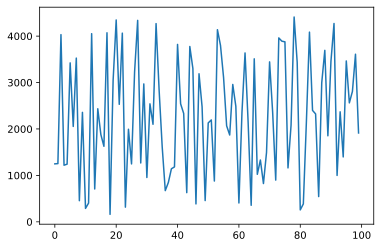

In [7]:
np.random.seed(42)

num_samples = 100
num_features = 20
xs = np.random.uniform(1, 5, size=(num_samples, num_features))
xs[:, -1] = np.random.uniform(100, 5000, size=num_samples) # last column: a big scaled feature
w = np.random.rand(num_features)
noise_sigma = 50
ys = np.sum(xs * w, axis=1) + noise_sigma * np.random.randn(num_samples)
ys_0 = ys.copy()

plt.plot(ys_0)
print(w)

mean(w): 0.5342292427049959


,LR,Norm LR
MSE,1630.635880,1610.117127
MAE,32.657461,32.635757
R^2,0.998955,0.998967
"W, MSE",16.110576,0.345903
"W, MAE",3.414311,0.496159


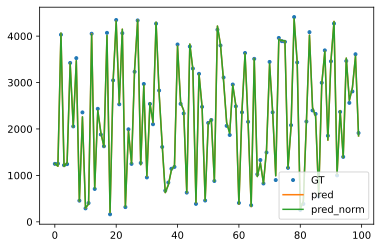

In [8]:
w_hat = utils.solve(xs, ys)
y_hat = np.dot(xs, w_hat)
y_hat_norm, norm_w_hat = utils.solve_predict_norm(xs, ys)

plt.plot(ys, marker=".", lw=0, label="GT")
plt.plot(y_hat, label="pred")
plt.plot(y_hat_norm, label="pred_norm")
plt.legend()

res_df =  pd.DataFrame(data={
    "LR": [
        utils.mse(y_hat, ys), utils.mae(y_hat, ys), utils.r2(y_hat, ys),
        utils.mse(w_hat, w), utils.mae(w_hat, w)
    ],
    "Norm LR": [
        utils.mse(y_hat_norm, ys), utils.mae(y_hat_norm, ys), utils.r2(y_hat_norm, ys),
        utils.mse(norm_w_hat, w), utils.mae(norm_w_hat, w)
    ],
}, columns=["LR", "Norm LR"], index=["MSE", "MAE", "R^2", "W, MSE", "W, MAE"])

print("mean(w):", np.mean(w)) # to campre with w_mse

res_df

In [9]:
# MSE are similar but normalization is important
# --> because weights are more realistic

,LR,Norm LR,Ridge(10000.0),Norm Ridge(10000.0)
MSE,1630.635880,1610.117127,2166.610325,1.524457e+06
MAE,32.657461,32.635757,36.814633,1.053941e+03
R^2,0.998955,0.998967,0.998639,-6.438018e+03
"W, MSE",16.110576,0.345903,0.185139,3.823706e-01
"W, MAE",3.414311,0.496159,0.323194,5.336441e-01


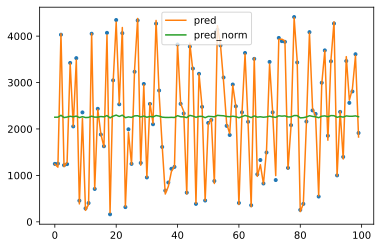

In [10]:
alpha = 1e4
w_hat = utils.solve(xs, ys, alpha=alpha)
y_hat = np.dot(xs, w_hat)
y_hat_norm, norm_w_hat = utils.solve_predict_norm(xs, ys, alpha=alpha)

plt.plot(ys, marker=".", lw=0)
plt.plot(y_hat, label="pred")
plt.plot(y_hat_norm, label="pred_norm")
plt.legend()

res_df["Ridge({})".format(alpha)] = [utils.mse(y_hat, ys), utils.mae(y_hat, ys), utils.r2(y_hat, ys),
                                     utils.mse(w_hat, w), utils.mae(w_hat, w)]
res_df["Norm Ridge({})".format(alpha)] = [utils.mse(y_hat_norm, ys), utils.mae(y_hat_norm, ys), utils.r2(y_hat_norm, ys),
                                         utils.mse(norm_w_hat, w), utils.mae(norm_w_hat, w)]
res_df

In [11]:
# What happened?
# normalized ridge destroys every prediction
# because alpha is too big

In [12]:
# alpha makes norm_w_hat are too small
np.mean(norm_w_hat), np.mean(w), np.mean(w_hat)

(0.0005851593501493092, 0.5342292427049959, 0.2574364210147364)

In [13]:
# if we had different scaled features in dataset
# alpha should be used differently!

0.049744268613717744


,LR,Norm LR,Ridge(10000.0),Norm Ridge(10000.0),Norm Ridge(0.001)
MSE,1630.635880,1610.117127,2166.610325,1.524457e+06,1610.117322
MAE,32.657461,32.635757,36.814633,1.053941e+03,32.636163
R^2,0.998955,0.998967,0.998639,-6.438018e+03,0.998967
"W, MSE",16.110576,0.345903,0.185139,3.823706e-01,0.345902
"W, MAE",3.414311,0.496159,0.323194,5.336441e-01,0.496158


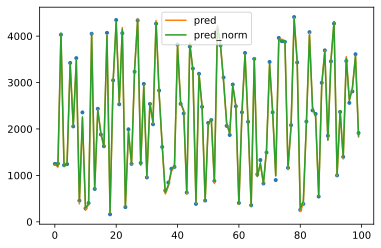

In [14]:
alpha = 1e-3
y_hat_norm, norm_w_hat = utils.solve_predict_norm(xs, ys, alpha=alpha)

plt.plot(ys, marker=".", lw=0)
plt.plot(y_hat, label="pred")
plt.plot(y_hat_norm, label="pred_norm")
plt.legend()

res_df["Norm Ridge({})".format(alpha)] = [utils.mse(y_hat_norm, ys), utils.mae(y_hat_norm, ys), utils.r2(y_hat_norm, ys),
                                         utils.mse(norm_w_hat, w), utils.mae(norm_w_hat, w)]

print(np.mean(norm_w_hat))
res_df